## LAB 1

In [1]:
from math import pi, e, cos, sqrt, factorial, floor, erf
import numpy as np
from matplotlib import pyplot as plt
from scipy.special import comb
from scipy.stats import norm, cauchy
import random
import time
import scipy

# Exercise 1

In [2]:
def get_generator_values(n, generator_func, init_func, change_seed_func):
    generated = []
    values = init_func()
    for i in range(0, n):
        seed, x  = generator_func(*values)
        values = change_seed_func(seed)
        generated.append(x)
    return generated
        

In [3]:
def linear_generator(a1, a0, m, seed=0):
    seed = (a1 * seed + a0) % m
    return seed, seed/(m-1)
    
def init_linear_generator(seed):
    a1, a0 =  floor(pi * 10 ** 9), floor(e * 10 ** 9), 
    m = 2 ** 35 
    return a1, a0, m, seed

def change_linear_generator_seed(seed):
    return init_linear_generator(seed)

<module 'matplotlib.pyplot' from '/home/stanislaw/.local/lib/python3.6/site-packages/matplotlib/pyplot.py'>

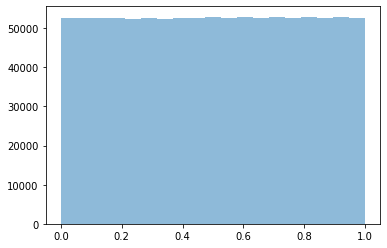

In [4]:
generated_linear = get_generator_values(1000000,
                                        linear_generator,
                                        lambda: init_linear_generator(seed=0),
                                        change_linear_generator_seed)

bins = np.linspace(0, 1, 20)
plt.hist(generated_linear, bins=bins, alpha=0.5)
plt

# Exercise 5 (Connected with ex. 1)

In [5]:
def init_JKISS_generator():
    x = 123456789
    y = 987654321
    z = 43219876
    c = 6543217
    m = 2**32
    return x, y, z, c, m

def JKISS_generator(x, y, z, c, m):
    x = to_int32(to_int32(314527869 * x) + 1234567)
    y ^= to_int32(y << 5)
    y ^= y >> 7
    y ^= to_int32(y << 22)
    t = ((4294584393 * z) % (2 ** 64) + c) % (2 ** 64)
    c = t >> 32
    z = to_int32(t)
    return [x, y, z, c, m], to_int32(x + y + z)/(m-1)

def to_int32(number):
    return number % (2 ** 32)

def change_JKISS_generator_seed(values):
    return values



<module 'matplotlib.pyplot' from '/home/stanislaw/.local/lib/python3.6/site-packages/matplotlib/pyplot.py'>

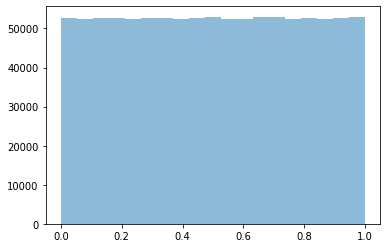

In [6]:
generated_JKISS = get_generator_values(1000000,
                    JKISS_generator,
                    init_JKISS_generator,
                    change_JKISS_generator_seed)
bins = np.linspace(0, 1, 20)
plt.hist(generated_JKISS, bins=bins, alpha=0.5)
plt

Time comparison

Comment: Linear generator - fixed bug: initialization calculations made in each iteration. Was 7 times slower, now is about 3 times slower than normal python generator. 

In [7]:
n = 1000000
start = time.time()
python_generated = []
for z in range(0, n):
    python_generated.append(random.random())
end = time.time()
print("Generator from Python: ", end - start)



a1, a0, m, seed = init_linear_generator(seed=0)
start = time.time()
linear_generated = []
for z in range(0, n):
    seed,x = linear_generator(a1, a0, m, seed)
    linear_generated.append(x)
end = time.time()
print("Linear Generator: ", end - start)


start = time.time()
JKISS_generated = get_generator_values(n,
                    JKISS_generator,
                    init_JKISS_generator,
                    change_JKISS_generator_seed)
end = time.time()
print("JKISS generator: ",  end - start)

Generator from Python:  0.12067699432373047
Linear Generator:  0.42357325553894043
JKISS generator:  1.3062944412231445


# Exercise 2

In [8]:
def f(x):
    return ((1 + cos(x)) * e**(-x**2/2)) /  ((1 +e**(-0.5))* sqrt(2*pi))


def f_generator(a):
    x = np.random.normal()
    y = np.random.uniform(0, 1)
    if y > f(x)/(a*norm.pdf(x)):
        x = f_generator(a)
    return x

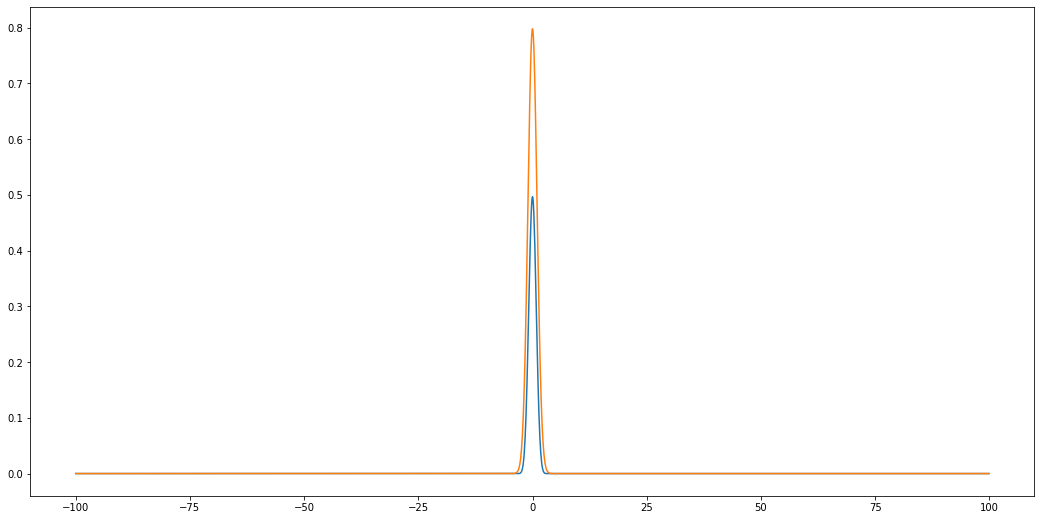

In [9]:
fig, ax = plt.subplots(figsize=(18, 9))
data = np.arange(-100, 100, 0.1)
f_data = np.array([f(x) for x in data])
# norm_data = np.array(scipy.stats.norm(x) for x in data)
ax.plot(data, f_data)
ax.plot(data, 2*norm.pdf(data))
ax

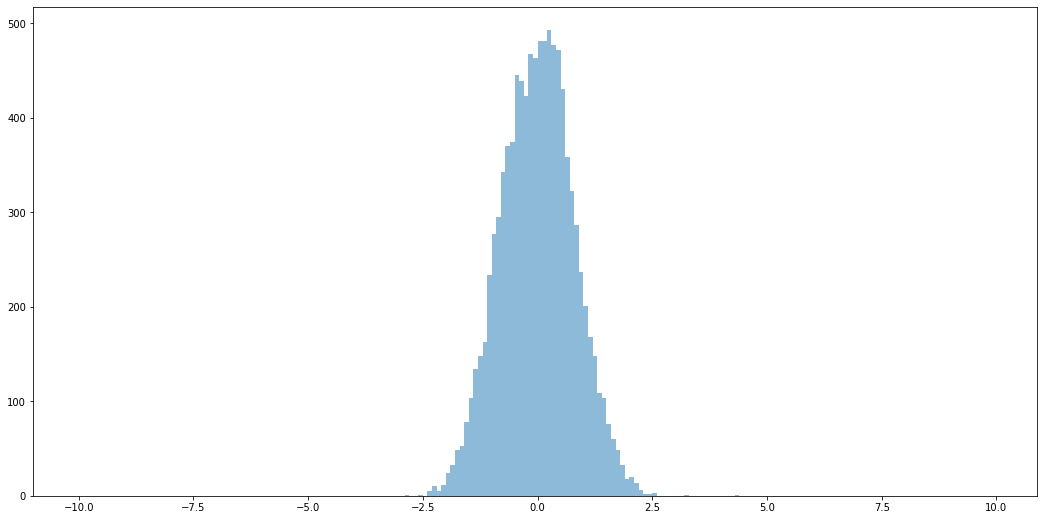

In [10]:
fig, ax = plt.subplots(figsize=(18, 9))
data = np.arange(-10, 10, 0.1)
f_data = np.array([f_generator(2) for x in range(0, 10000)])
ax.hist(f_data, bins=data, alpha=0.5)
ax

# Exercise 3

In [11]:
def poisson_pmf(lbda, k):
    return (lbda ** k * e ** (-lbda)) / factorial(k)


def poisson_cdf(lbda, k):
    result = 0
    if k >= 0:
        result = poisson_pmf(lbda, k) + poisson_cdf(lbda, k - 1)
    return result


def poisson_generator1(lbda):
    x = np.random.uniform(0, 1)
    result = 0
    while (poisson_cdf(lbda, result - 1) > x) or (poisson_cdf(lbda, result) <= x):
        result += 1
    return result


def poisson_generator2(lbda):
    k = 0
    p = 1
    L = e ** (-lbda)
    while p >= L:
        k = k+1
        p = p* np.random.uniform(0,1)
    return k-1

1. First option

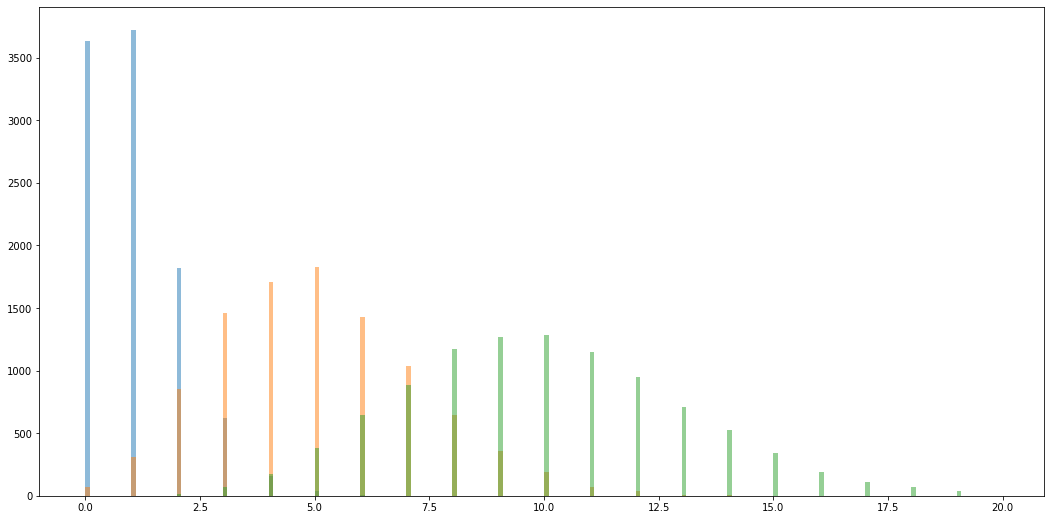

In [12]:
n = 10000
fig, ax = plt.subplots(figsize=(18, 9))
data = np.arange(0, 20, 0.1)
lbda1 = np.array([poisson_generator1(1) for x in range(0, n)])
lbda5 = np.array([poisson_generator1(5) for x in range(0, n)])
lbda10 = np.array([poisson_generator1(10) for x in range(0, n)])
ax.hist(lbda1, bins=data, alpha=0.5)
ax.hist(lbda5, bins=data, alpha=0.5)
ax.hist(lbda10, bins=data, alpha=0.5)
ax

2. Second option

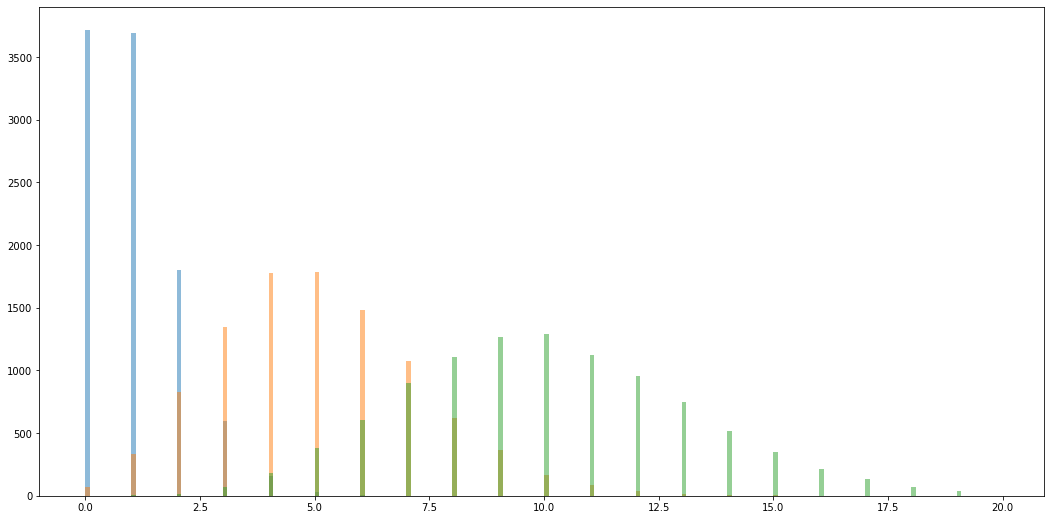

In [13]:
n = 10000
fig, ax = plt.subplots(figsize=(18, 9))
data = np.arange(0, 20, 0.1)
lbda1 = np.array([poisson_generator2(1) for x in range(0, n)])
lbda5 = np.array([poisson_generator2(5) for x in range(0, n)])
lbda10 = np.array([poisson_generator2(10) for x in range(0, n)])
ax.hist(lbda1, bins=data, alpha=0.5)
ax.hist(lbda5, bins=data, alpha=0.5)
ax.hist(lbda10, bins=data, alpha=0.5)
ax

# Exercise 4

In [14]:
def custom_cdf(x):
    binomial_coef = sum(comb(10, i) * (1 / 3) ** i * (2 / 3) ** (10 - i) for i in range(0, floor(x) + 1))
    normal_coef = 1 / 2 * (1 + erf(x / sqrt(2)))
    exp_coef = (1 - e ** (-x)) if x>=0 else 0
    return (binomial_coef + normal_coef + exp_coef) / 3

In [15]:
def get_custom_rundom_number():
    x = random.randint(0, 2)
    return {
        0: np.random.binomial(10, 1/3),
        1: np.random.normal(),
        2: np.random.exponential(1)
    }[x]


<module 'matplotlib.pyplot' from '/home/stanislaw/.local/lib/python3.6/site-packages/matplotlib/pyplot.py'>

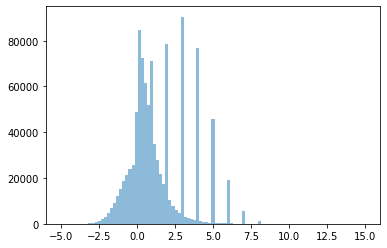

In [16]:
random_numbers = [get_custom_rundom_number() for x in range(1000000)]

bins = np.linspace(-5, 15, 100)
plt.hist(random_numbers, bins=bins, alpha=0.5)
plt

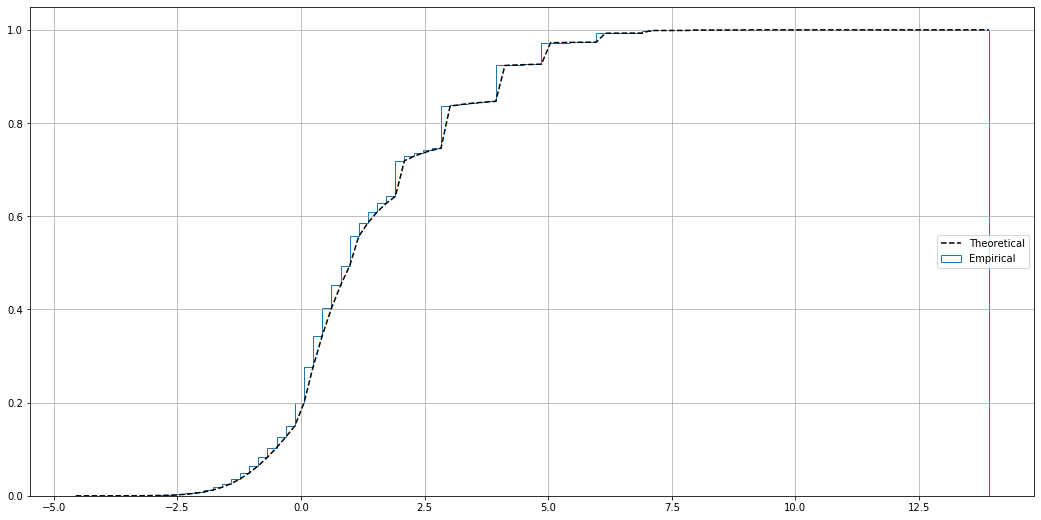

In [17]:
fig, ax = plt.subplots(figsize=(18, 9))
n_bins = 100

n, bins, patches = ax.hist(random_numbers, n_bins, density=True, histtype='step',
                           cumulative=True, label='Empirical')

f_data = np.array([custom_cdf(x) for x in bins])

ax.plot(bins, f_data , 'k--', linewidth=1.5, label='Theoretical')
ax.grid(True)
ax.legend(loc='right')